# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить любое из двух заданий

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

Необходимо написать функции `train_one_epoch`, `train` и `predict` по шаблонам ниже (во многом повторяют примеры с семинаров).Обратите особое внимание на функцию `predict`: она должна возвращать список лоссов по всем объектам даталоадера, список предсказанных классов для каждого объекта из даталоалера и список настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам. Если вы выполнили оба задания, то берется максимум из двух оценок.

__Бонус__. Вы получаете 5 бонусных баллов если справляетесь с обоими заданиями на 10 баллов (итого 15 баллов). В противном случае выставляется максимальная из двух оценок и ваш бонус равен нулю.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [ ]:
import numpy as np
import torch
import torchvision
import tqdm
from torch import nn
from torch.nn import functional as F
from sklearn.metrics import accuracy_score

In [ ]:
import sys
from torchvision import transforms
import random
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

### Подготовка данных

In [ ]:
!wget -O dataset.zip https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip..
!unzip -qq dataset.zip -d dataset

--2021-11-20 15:14:27--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip..
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/33l8lp62rmvtx40/dataset.zip.. [following]
--2021-11-20 15:14:28--  https://www.dropbox.com/s/raw/33l8lp62rmvtx40/dataset.zip..
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc12eef56eeb30b60f407f21b626.dl.dropboxusercontent.com/cd/0/inline/BaWperoDihcEzBVrmz0IC6FhPqtTwCHnDG-7dyCQzxqhZGNERqGrDi1MpBbaww6fNidGK7B79aDUE3dJv8m5M1aO8OkIvaN3O1YzFDC24jWFOJtXlQvlNYvwKcHa2XqCMdYsErKdYsK8mX0pXPFveUR9/file# [following]
--2021-11-20 15:14:28--  https://uc12eef56eeb30b60f407f21b626.dl.dropboxusercontent.com/cd/0/inline/BaWperoDihcEzBVrmz0IC6FhPqtTwCHnDG-7dyCQzxqhZGNERqGrDi1MpBbaww6fNidGK7B79aDUE3dJv8m5M1a

In [ ]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [ ]:
seed = 123
batch_size = 512
set_random_seed(seed)

import PIL
train_transform = transforms.Compose([
    transforms.RandomApply(torch.nn.ModuleList([
        transforms.ColorJitter(hue=.05, saturation=.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomResizedCrop(64)
    ]), p=0.8),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.ImageFolder("./dataset/dataset/dataset/train", transform=train_transform)
val_dataset = torchvision.datasets.ImageFolder("./dataset/dataset/dataset/val", transform=val_transform)

train_dataloader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    pin_memory=True,
    num_workers=2
)
val_dataloader = torch.utils.data.DataLoader(
    dataset=val_dataset,
    batch_size=batch_size,
    shuffle=False,
    pin_memory=True,
    num_workers=2
)

In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Вспомогательные функции, реализация модели

In [ ]:
def train_one_epoch(model, train_dataloader, criterion, optimizer, device="cuda:0"):
    model = model.to(device).train()

    with tqdm(total=len(train_dataloader), file=sys.stdout) as prbar:
        for images, labels in train_dataloader:
            images, labels = images.to(device), labels.to(device)

            predicted = model(images)
            loss = criterion(predicted, labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            accuracy = (predicted.argmax(1) == labels).float().mean()
            prbar.set_description(
                f"Train loss: {round(loss.item(), 4)} "
                f"accuracy: {round(accuracy.item(), 4)}"
            )
            prbar.update(1)
            wandb.log({'Train loss' : loss, 'Train accuraccy' : accuracy})


def predict(model, val_dataloader, criterion, device="cuda:0"):
    model = model.to(device).eval()
    batch_losses = []
    total_predictions = np.array([])
    total_labels = np.array([])
    with tqdm(total=len(val_dataloader), file=sys.stdout) as prbar:
        with torch.no_grad():
            for images, labels in val_dataloader:
                images, labels = images.to(device), labels.to(device)

                predicted = model(images)
                loss = criterion(predicted, labels)
                batch_losses.append(loss.cpu().detach().numpy())

                accuracy = (predicted.argmax(1) == labels).float().mean()
                prbar.set_description(
                    f"Val loss: {round(loss.item(), 4)} "
                    f"accuracy: {round(accuracy.item(), 4)}"
                )
                prbar.update(1)
                total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
                total_labels = np.append(total_labels, labels.cpu().detach().numpy()) 
    return np.array(batch_losses), total_predictions, total_labels


def train(model, train_dataloader, val_dataloader, criterion, optimizer, device="cuda:0", n_epochs=10, scheduler=None):
    epoch_eval_losses = []
    epoch_eval_accuracy = []
    for epoch in range(n_epochs):
        train_one_epoch(
            model=model,
            train_dataloader=train_dataloader,
            optimizer=optimizer,
            criterion=criterion,
            device=device
        )
        scheduler.step()

        val_batch_loss, val_predicted, val_labels = predict(
            model=model,
            val_dataloader=val_dataloader,
            criterion=criterion,
            device=device
        )
        acc = accuracy_score(val_predicted, val_labels)
        wandb.log({'Val loss' : val_batch_loss.mean(), 'Val accuraccy' : acc})


### Посмотрю подробнее на данные

In [ ]:
len(train_dataset)

100000

In [ ]:
train_dataset[0][0].shape

torch.Size([3, 64, 64])

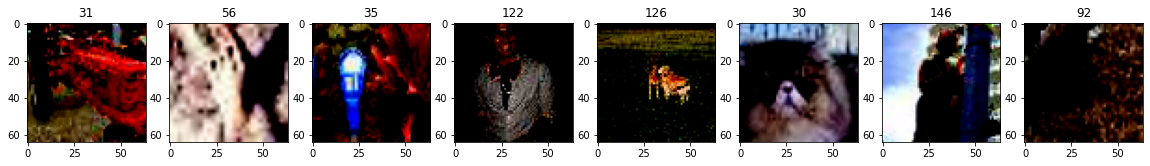

In [ ]:
np.random.seed(seed)
plt.figure(figsize=(20, 5))
for i, num in enumerate(list(np.random.randint(0, 100000, size=8))):
    plt.subplot(1, 8, i + 1)
    plt.imshow(train_dataset[num][0].permute([1, 2, 0]).numpy())
    plt.title(str(train_dataset[num][1]))
plt.show()

### Обучение модели, запуски экспериментов

In [ ]:
!pip install wandb --upgrade --quiet
import wandb
wandb.login()

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
torchvision.models.resnet18()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
set_random_seed(seed)
model = torchvision.models.resnet18(pretrained=False)
model.fc = nn.Linear(512, 200)

optimizer = torch.optim.Adam(model.parameters(), 1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.5, verbose=True)
criterion = nn.CrossEntropyLoss()
n_epochs = 40
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

Adjusting learning rate of group 0 to 1.0000e-03.


In [ ]:
device

device(type='cuda', index=0)

Простой тест на проверку правильности написанного кода

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")

  0%|          | 0/20 [00:00<?, ?it/s]

tests passed


Запустить обучение можно в ячейке ниже.

In [ ]:
set_random_seed(seed)
wandb.init(
    project='homework_2',
    name = 'resnet18',
    config={'epochs' : n_epochs,
            'batch_size' : batch_size,
            'model' : model,
            'optimizer' : optimizer,
            'scheduler' : scheduler,
            'description' : 'RandomApply(ColorJitter, RandomHorizontalFlip, RandomResizedCrop), p=0.8;\
             Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) instead Normalize((0.5, 0.5, 0.5), (1, 1, 1));\
             scheduler: StepLR(optimizer, step_size=6, gamma=0.5, verbose=True)'}
)
wandb.watch(model);
train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

wandb: Currently logged in as: polina_cherepanova (use `wandb login --relogin` to force relogin)


  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 5.0000e-04.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 5.0000e-04.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 5.0000e-04.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 5.0000e-04.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 5.0000e-04.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 5.0000e-04.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 2.5000e-04.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 2.5000e-04.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 2.5000e-04.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 2.5000e-04.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 2.5000e-04.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 2.5000e-04.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.2500e-04.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.2500e-04.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.2500e-04.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.2500e-04.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.2500e-04.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.2500e-04.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 6.2500e-05.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 6.2500e-05.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 6.2500e-05.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 6.2500e-05.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 6.2500e-05.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 6.2500e-05.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 3.1250e-05.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 3.1250e-05.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 3.1250e-05.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 3.1250e-05.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 3.1250e-05.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 3.1250e-05.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.5625e-05.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.5625e-05.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.5625e-05.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.5625e-05.


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.5625e-05.


  0%|          | 0/20 [00:00<?, ?it/s]

### Проверка полученной accuracy

После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, реализуйте и запустите функцию `evaluate`. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [ ]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print(accuracy)
print("Оценка за это задание составит {} баллов".format(min(10, 10 * accuracy / 0.44)))

  0%|          | 0/20 [00:00<?, ?it/s]

0.4473
Оценка за это задание составит 10 баллов


### Отчёт об экспериментах

За всеми экспериментами я следила с помощью сайта wandb, сведения о всех основных запусках и о дополнительных хранятся в проекте "homework_2_task_1" в моём профиле: https://wandb.ai/polina_cherepanova.

Основые запуски я переименовала по особенному, нижу в отчёте они будут указаны, так же вставила скриншоты, чтобы не было необходимости переходить на wandb, но подробнее можно посмотреть всё там.

1) С самого начала я взяла resnet18 и попробовала обучить его без аугментаций, получила лучший скор = 0.1638, модель под названием "First, simple resnet18" Так же была попытка добавить ещё один линейный слой перед выходными вероятностями, но это попытка не дала прироста в качестве от слова совсем.

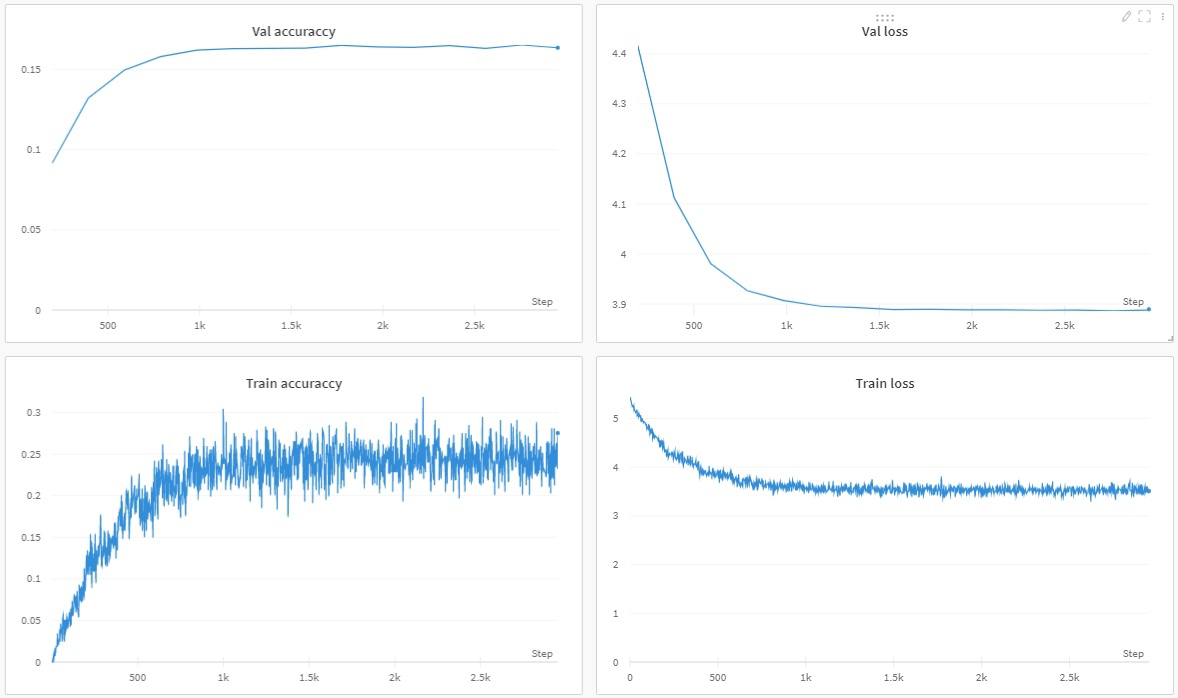

2) Далее, после того как я поняла, что никакие аугментации не дают прироста в качестве (хотя должны) я попробовала использовать scheduler = StepLR(optimizer, step_size=5, gamma=0.5, verbose=True), увеличила изначальный шар оптимизатора до lr=0.001 и увеличила число эпох с 15 до 30. Модель называется "Second, resnet18 + scheduler". Так я получила первый более менее вменяемый результат = 0.3805. Но по ошибке на валидации, которая сначала убывала, а потом стала возрастать, да и по разницы в качестве на трейне и валидации (трейн = 0.8126, валидация = 0.3805) понятно, что модель сильно переобучается (хотя в этом варианте я уже использовала AutoAugment, но видимо, этого недостаточно) и нужно с этим бороться.

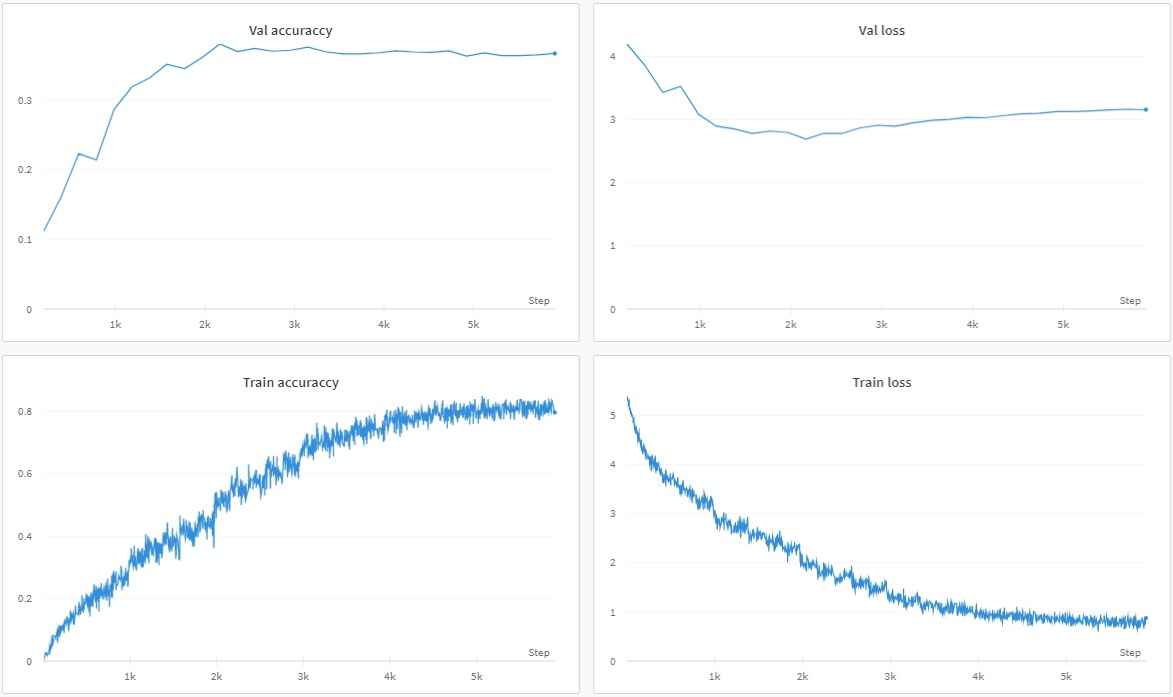

3) За тем начилась большая череда экспериментов с различными аугментациями, я добавляла по одной и смотрела, как меняется качество, выбирала лучшие, пыталась комбинировать. У меня получилось, что
* RandomResizedCrop -даёт существенное улучшение
* RandomHorizontalFlip - даёт существенное улучшение
* ColorJitter - даёт небольшое улучшение (по эффективности уступает двум аугментациям, названным выше, но всё же помогает)
* RandomRotation - с какмим бы параметрами и в какой бы комбинации с другими аугминтациями я не пробовала RandomRotation, качетво только падало, поэтому я решила отбросить данную аугментацию.
Модель называется - "Third, resnet18 + good Augmentations", в ней использованы только RandomResizedCrop и RandomHorizontalFlip, качество 0.4075, при этом, на этой модели удалось избавиться от переобучения, скор на трейне = 0.4512.

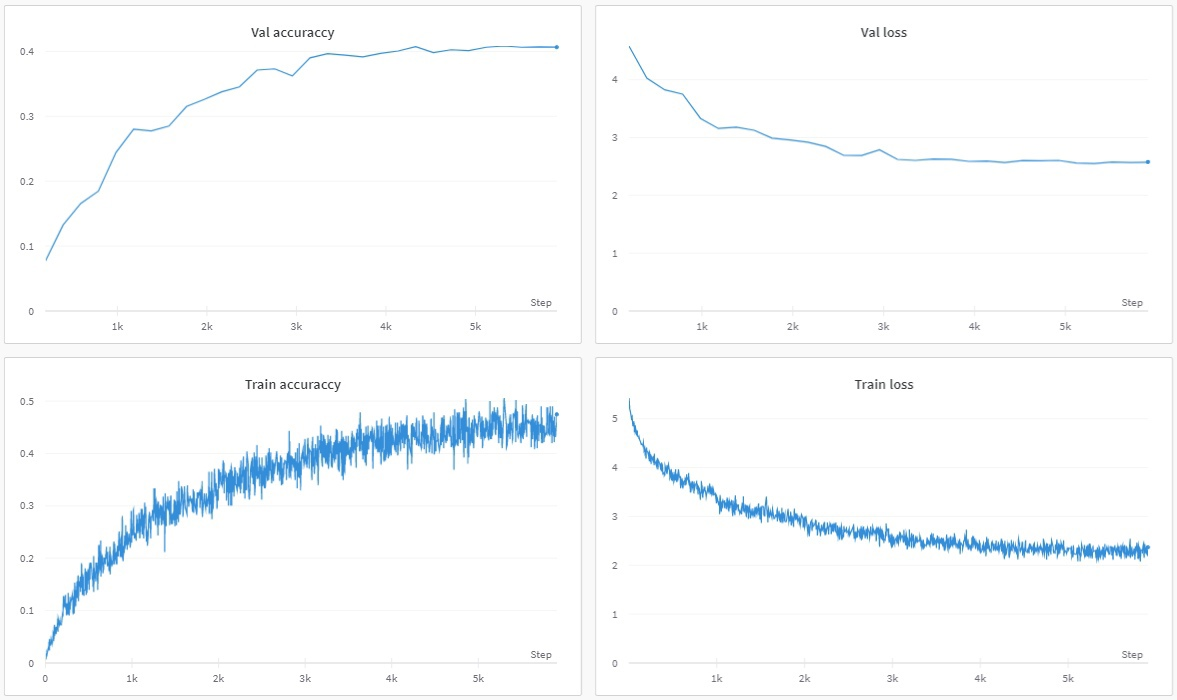

4) И наконец, в модели "Fourth, resnet18 + best Augmentations" были подобраны аугментации, при которых скор на валидации достиг 0.4392. Здесь я использовала RandomApply с вероятностью p=0.8 (вероятность также подбиралась в экспериментах) и списком применяемых аугментаций: ColorJitter, RandomHorizontalFlip, RandomResizedCrop с определёнными параметрами.

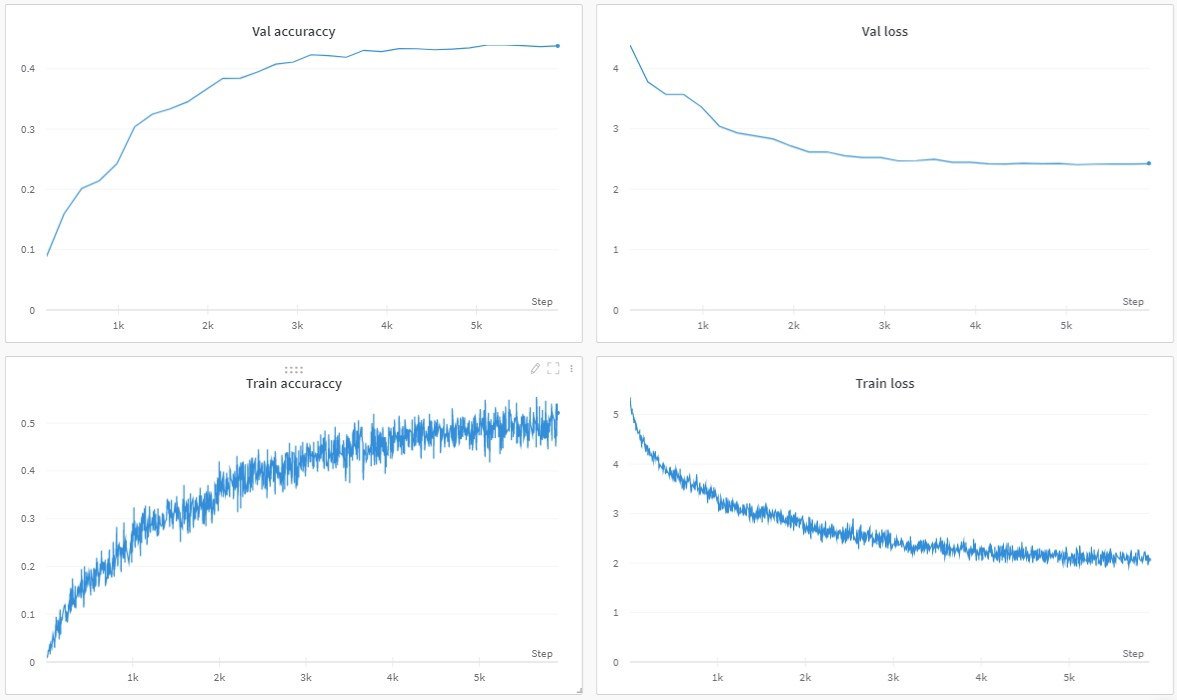

5) По графику описанной в 4-м пункте модели, я поняла, что прирост в качестве на последних итерациях наблюдался за счёт уменьшения шага (которое из-за параметра шедулера step_size=5 происходило раз в 5 эпох), поэтому я решила поработать надо шедулером. Я пробовала step_size=4 и step_size=6, при этом увеличив число эпох до 40 (на всякий случай). Именно с параметром step_size=6 была получены итоговая модель, под названием "Fifth, resnet18, the best accuracy", которая дала результат = 0.4473.

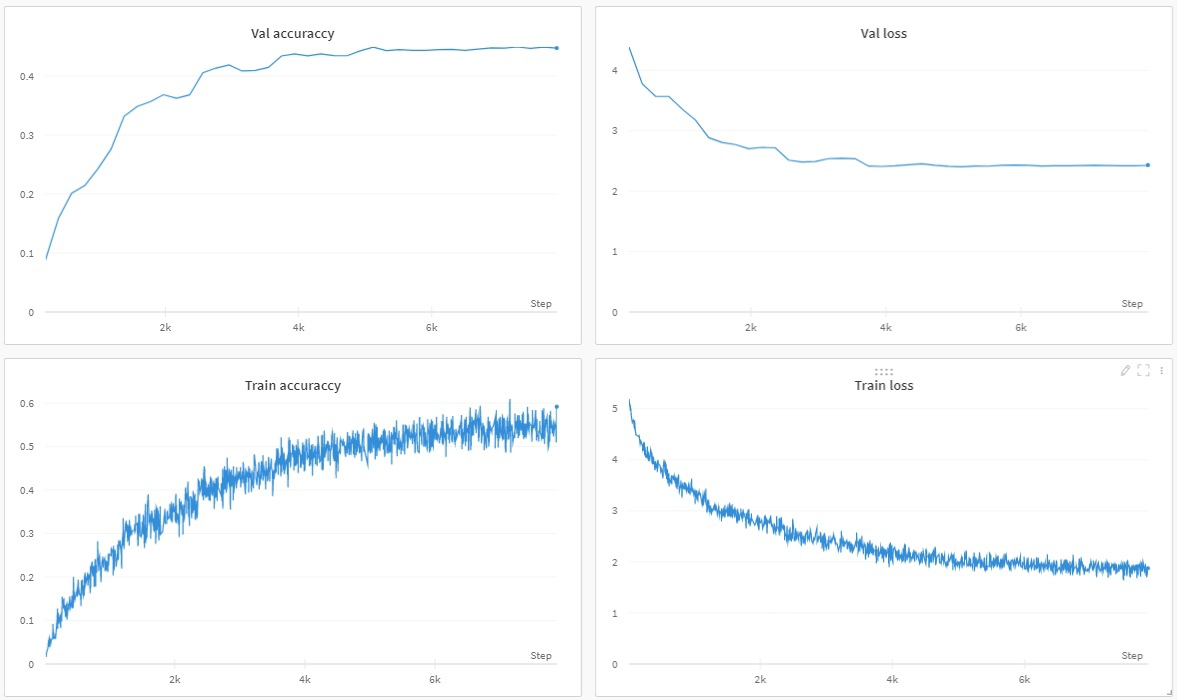

6) Одновременно с предыдущей моделью выучилась на требуемый скор и ещё одна модель "Sixth, resnet18,  the best accuracy 2x" на ней было получено качество 0.4408. Здесь параметр step_size=5, но при этом я изменила параметры в ColorJitter, уменьшив параметры hue и saturation с 0.05 до 0.025 (то есть картинка меньше изменялась).

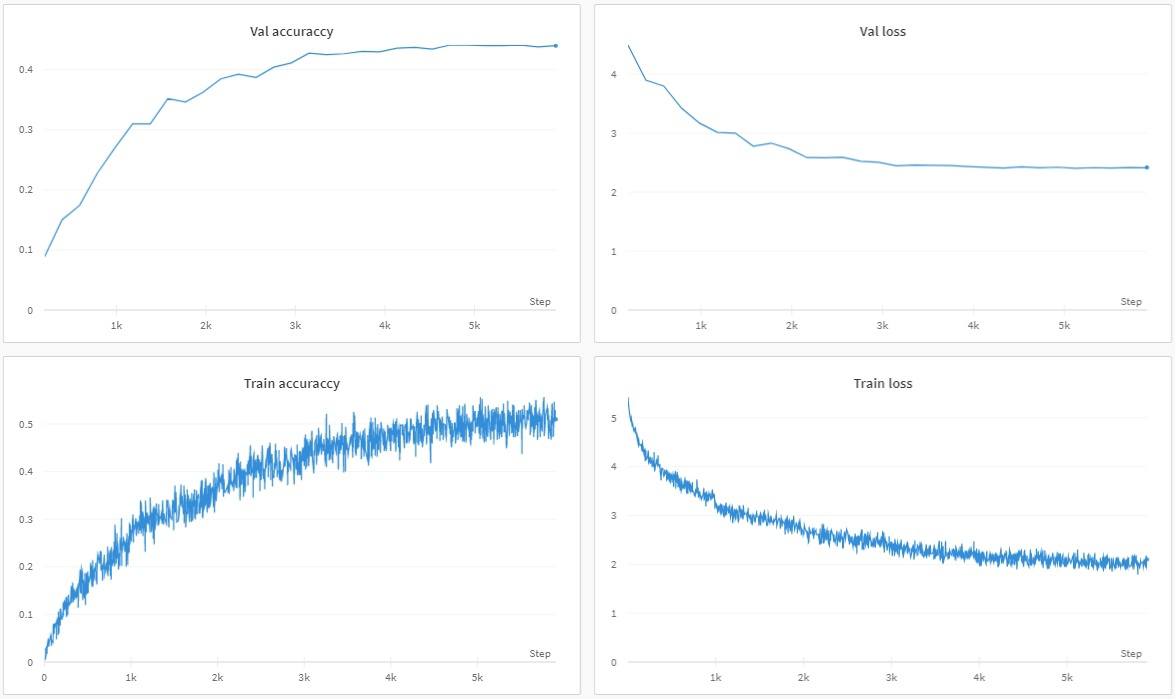